# Random Walks en Alianzas de Aerolíneas

## Paquetes

In [1]:
using StatsBase

In [2]:
using DelimitedFiles

In [3]:
using Plots

In [ ]:
using Plotly

In [ ]:
using FreqTables

In [ ]:
using StatsPlots

In [ ]:
using Documenter

In [ ]:
Pkg.add("Gadfly")

In [4]:
cd("$(homedir())/Documents/UNAM/Tesis_Lic")

## Funciones

In [5]:
"""
    n_in_degree(M::Array{Int64,2}, n::Int64)

Función que obtiene el grado de entrada de un cierto nodo n de la red representada por la matriz de adyacencia M.

Parámetros:
* M matriz de adyacencia que acepta un arreglo de tipo Array{Int64,2}
* n nodo a evaluar de tipo Int64

Resultado:
Grado de entrada del nodo n representado por un valor numérico de tipo Int64

## Implementación

### Ejemplos
"""

function n_in_degree(M::Array{Int64,2}, n::Int64)
    grado_entrada = sum(M[n, :])
end

n_in_degree (generic function with 1 method)

In [7]:
"""
in_degree(M)

Función que obtiene el grado de entrada de una red representada por la matriz de adyacencia M.

Parámetros:
* M matriz de adyacencia que acepta un arreglo de tipo Array{Int64,2}

Resultado:
Devuelve un arreglo de tipo Array{Int64,2} que contiene los grados de entrada de todos los nodos n de la red.

## Implementación

### Ejemplos
"""

function in_degree(M::Array)
    grados_entrada = sum(M, dims = 2)
end

in_degree (generic function with 1 method)

In [173]:

function in_degreeP(M::Array)
    grados = Int64[]
    grados_entrada = sum(M, dims = 2)
    for i in 1:length(grados_entrada)
        push!(grados, grados_entrada[i])
    end
    grados
end

in_degreeP (generic function with 1 method)

In [8]:
"""
n_out_degree(M, n)

Función que obtiene el grado de salida de un cierto nodo n de la red representada por la matriz de adyacencia M.

Parámetros:
* M matriz de adyacencia que acepta un arreglo de tipo Array{Int64,2}
* n nodo a evaluar de tipo Int64

Resultado:
Grado de salida del nodo n representado por un valor numérico de tipo Int64

## Implementación

### Ejemplos
"""

function n_out_degree(M::Array{Int64,2}, n::Int64)
    grado_salida = sum(M[:, n])
end

n_out_degree (generic function with 1 method)

In [9]:
"""
out_degree(M)

Función que obtiene el grado de salida de una red representada por la matriz de adyacencia M.

Parámetros:
* M matriz de adyacencia que acepta un arreglo de tipo Array{Int64,2}

Resultado:
Devuelve un arreglo de tipo Array{Int64,2} que contiene los grados de salida de todos los nodos n de la red.

## Implementación

### Ejemplos
"""

function out_degree(M::Array)
    grados_salida = sum(M, dims = 1)
end

out_degree (generic function with 1 method)

In [172]:

function out_degreeP(M::Array)
    grados = Int64[]
    grados_salida = sum(M, dims = 1)
    for i in 1:length(grados_salida)
        push!(grados, grados_salida[i])
    end
    grados
end

out_degreeP (generic function with 1 method)

In [ ]:
function distrib_in_degree(M::Array)
    x = in_degree(M)
    distribucion = Int64[]
    
    for i in 1:length(x)
        degree_count = count(x == i, x)
        push!(distribucion, degree_count)
    end
    distribucion
end

In [ ]:
#Hacer una función analize_distribution que nos dé el diccionario de frecuencias 

In [ ]:
function distrib_out_degree(M::Array)
    x = out_degree(M)
    counts(x)
end

In [ ]:
function distrib_degree(M::Array)
    x = degree(M)
    
end

In [ ]:
#Función que plotee la distribución
function plot_distrib
    

In [121]:
"""
La función r_walks tiene como parámetros:
M, matriz de adyacencia de tipo Array{Int64,2}
f, nodo inicial de tipo Int64
steps, número de pasos de tipo Int64
iter, número de iteraciones de tipo Int64.
La función crea un caminante aleatorio sobre la matriz, el cual tiene igual probabilidad de avanzar 
hacia cualquiera de sus vecinos.
Regresa un arreglo que contiene todas las trayectorias que tomó el caminante aleatorio.
"""

function r_walks(M::Array{Float64,2}, f::Int64, steps::Int64, iter::Int64)
    nodos = size(M, 1) #aeropuertos  
    paths = zeros(Int64, (iter, steps + 1))
    s = f

    for i in 1:iter
        paths[i, 1] = f
        for p in 1:steps 
            row = M[s, :] #Renglón correspondiente al nodo s
            vecinos = findall(x -> x != 0, row)
            if vecinos == []
                break
            else
                a = sample(vecinos)
                paths[i, p + 1] = a
            s = a
            end
        end
        s = f
    end
    return paths 
end

r_walks (generic function with 2 methods)

In [120]:
"""
La función random_walk tiene como parámetros:
M, matriz de adyacencia de tipo Array{Int64,2}
steps, número de pasos de tipo Int64
iter, número de iteraciones de tipo Int64.
La función crea un caminante aleatorio sobre la matriz con igual probabilidad de avanzar 
hacia cualquiera de sus vecinos. Esta función recorre todos los nodos de la red como
nodos iniciales y sobre ellos itera para obtener el número de caminos que se le pidió.
Regresa un arreglo que contiene arreglos asociados a todas las trayectorias que tomó el 
caminante aleatorio para cada nodo inicial de la red.
"""

function random_walk(M::Array{Float64,2}, steps::Int64, iter::Int64) #Debo agregarle el nodo inicial al inicio del path
    random_walks = []
    nodos = size(M, 1)
    for f in 1:nodos #aeropuertos
        paths = r_walks(M, f, steps, iter)
        push!(random_walks, paths)
    end
    random_walks
end

random_walk (generic function with 2 methods)

In [12]:
"""
La función walk_length tiene como parámetros:
RW, arreglo de arreglos de tipo Array{Any,1} que corresponde al arreglo de caminatas aleatorias.
La función regresa un arreglo de arreglos que contiene las longitudes de todas las trayectorias que tomó el 
caminante aleatorio para cada nodo inicial de la red.
"""

function walk_length(W)
    
    longitudes = Array[]
    c = 0
    v = length(W) #tamaño de la matriz, número de nodos
    s = size(W[1], 1) #lo puedo sacar, para todos es el mismo. Es el número de iteraciones
    t = size(W[1], 2) #número de pasos
    longz = zeros(Int64, s) #Arreglo de ceros de tamaño número de iteraciones
    
    for i in 1:v
        #@show i
        for j in 1:s
            #@show j
            for k in 1:t
                #@show k
                
                if W[i][j, :][k] != 0 #W[i][j, :] #renglón a analizar
                    c += 1 
                else
                    break
                end
                
            end
            longz[j] = c - 1
            #@show longz[j]
            c = 0
            
        end
        push!(longitudes, longz)
        #@show longitudes
        longz = zeros(Int64, s) #Arreglo de ceros de tamaño número de iteraciones
    end
    return longitudes
end

walk_length (generic function with 1 method)

In [13]:
"""
La función walk_av_length tiene como parámetro W, que es un arreglo de arreglos (que se puede obtener de la 
función walk_length). 
Regresa un arreglo con entradas correspondientes al promedio de las longitudes de 
las caminatas aleatorias para cada nodo de inicio antes de caer en un nodo con grado de salida 0.
"""

function walk_av_length(W) #Llamar a función
    
    proms = []
    wlength = walk_length(W)
    
    for i in 1:length(wlength)
        av = mean(wlength[i])
        push!(proms, av)
    end
    proms
end

walk_av_length (generic function with 1 method)

In [14]:
"""
La función caminos tiene como parámetro W que es un arreglo de arreglos.
Regresa los nodos diferentes a los que llega el caminante.
"""

function nodos_visitados(W)
    
    cobert = []
    v = length(W) #tamaño de la matriz, número de nodos
    s = size(W[1], 1) #lo puedo sacar, para todos es el mismo. Es el número de iteraciones
    t = size(W[1], 2) #número de pasos
    #visit = zeros(Int64, s) #Arreglo de ceros de tamaño número de iteraciones
    visit = []
    
    for i in 1:v        
        for j in 1:s
            u = unique(W[i][j, :])
            push!(visit, u)
        end
        push!(cobert, visit)
        visit = []
    end
    return cobert
end

nodos_visitados (generic function with 1 method)

In [15]:
function frecuencia_visitas_it(V::Array)
    
end

frecuencia_visitas_it (generic function with 1 method)

In [16]:
"""
La función cobertura tiene como parámetro W que es un arreglo de arreglos.
Regresa el número de nodos diferentes a los que llega el caminante.
"""

function cobertura(W) 
    
    cobert = []
    
    v = length(W) #tamaño de la matriz, número de nodos
    x = nodos_visitados(W)
    s = size(x[1], 1) #lo puedo sacar, para todos es el mismo. Es el número de iteraciones
    longz = zeros(Int64, s) #Arreglo de ceros de tamaño número de iteraciones
    
    for i in 1:v        
        for j in 1:s
            l = length(x[i][j])
            longz[j] = l
        end
        push!(cobert, longz)
        longz = zeros(Int64, s)
    end
    return cobert
end

cobertura (generic function with 1 method)

In [17]:
"""
n_length_av con parámetro W (caminatas) da el promedio de la caminata por nodo inicial. 
"""

function n_cobertura_av(W) #Esta es la importante
    
    longitud = []
    x = cobertura(W)
    
    for i in 1:length(x)
        l = mean(x[i])
        push!(longitud, l)
    end
    longitud
end

n_cobertura_av (generic function with 1 method)

In [18]:
"""
length_av da el promedio de la longitud de las caminatas para todos los nodos.
"""

function cobertura_av(W)
    x = n_cobertura_av(W)
    promedio = mean(x)
    return promedio

end

cobertura_av (generic function with 1 method)

In [19]:
"""
Da la longitud máxima de cada iteración de cada nodo inicial.
"""

function max_length(W)
    max = []
    x = cobertura(W)
    for i in 1:length(x)
        m = maximum(x[i])
        push!(max, m)
    end
    max
end

max_length (generic function with 1 method)

In [20]:
"""
Da la longitud máxima total.
"""

function Max_length(W)
    x = max_length(W)
    m = maximum(x)
    return m
end

Max_length (generic function with 1 method)

In [21]:
"""
Regresa el promedio de la longitud máxima de cada nodo inicial.
"""

function av_max_length(W)
    x = max_length(W)
    prom = mean(x)
    return prom
end

av_max_length (generic function with 1 method)

In [22]:
"""
Da la longitud mínima de cada iteración de cada nodo inicial.
"""

function min_length(W)
    min = []
    x = cobertura(W)
    for i in 1:length(x)
        m = minimum(x[i])
        push!(min, m)
    end
    min
end

min_length (generic function with 1 method)

In [23]:
"""
Da la longitud mínima total.
"""

function Min_length(W)
    x = min_length(W)
    m = minimum(x)
    return m
end

Min_length (generic function with 1 method)

In [24]:
"""
Regresa el promedio de la longitud mínima de cada nodo inicial.
"""

function av_min_length(W)
    x = min_length(W)
    prom = mean(x)
    return prom
end

av_min_length (generic function with 1 method)

In [25]:
"""
Atractor regresa un arreglo de arreglos que contiene los nodos en los que cae cada caminata y ya no puede salir.
"""

function atractor(W) #Debo llamar a walks
   atractores = []
    v = length(W) #tamaño de la matriz, número de nodos
    s = size(W[1], 1) #lo puedo sacar, para todos es el mismo. Es el número de iteraciones
    t = size(W[1], 2) #número de pasos
    atract = zeros(Int64, s) #Arreglo de ceros de tamaño número de iteraciones
    
    for i in 1:v        
        for j in 1:s
            a = W[i][j, :][t - 1]
            atract[j] = a
        end
        push!(atractores, atract)
        atract = zeros(Int64, s)
    end
    return atractores
end

atractor (generic function with 1 method)

## Datos

In [48]:
mSA = readdlm("data/multi_SA_du.csv", ',');

In [27]:
nom_SA = mSA[1, :];
nombres_SA = nom_SA[2:end]

934-element Array{Any,1}:
 "AOK"
 "ARN"
 "ATH"
 "AUH"
 "AXD"
 "BCN"
 "BEG"
 "BOD"
 "BRU"
 "BUD"
 "CAI"
 "CDG"
 "CFU"
 ⋮    
 "STL"
 "STT"
 "SYR"
 "TKK"
 "YAP"
 "HSN"
 "JUZ"
 "YIC"
 "GLF"
 "TMU"
 "GET"
 "PWM"

In [28]:
multiSA = mSA[2:end, :];
multiSA = multiSA[:, 2:end];

In [29]:
multiplexSA = convert(Array{Int64,2}, multiSA)

934×934 Array{Int64,2}:
 0  0  1  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  1  0  0  1  0  0  1  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  0  1  1  1  1  0  1  1  1  1  1     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  1  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  1  1  0  0  0  0  0  1  0  1  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  1  1  0  0  1  0  0  0  1  1  1  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  1  0  1  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  1  0  1  0  0  1  1  0  1  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  1  1  0  0  0  0  0  1  0  1  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0  

In [30]:
mOW = readdlm("data/multi_OW_du.csv", ',');

In [31]:
nom_OW = mOW[1, :];
nombres_OW = nom_OW[2:end]

698-element Array{Any,1}:
 "EZE"
 "MIA"
 "PUJ"
 "ABE"
 "ABQ"
 "AGS"
 "ALB"
 "AMS"
 "ANC"
 "ANU"
 "ASU"
 "ATH"
 "ATL"
 ⋮    
 "CRW"
 "LEX"
 "MOB"
 "PWM"
 "TYS"
 "VPS"
 "KEM"
 "AAL"
 "SLA"
 "TUC"
 "IQT"
 "NJC"

In [32]:
multiOW = mOW[2:end, :];
multiOW = multiOW[:, 2:end];

In [33]:
multiplexOW = convert(Array{Int64,2}, multiOW)

698×698 Array{Int64,2}:
 0  1  1  0  0  0  0  0  0  0  1  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 1  0  1  0  0  0  0  0  0  1  1  0  1     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  0  0  0  0  0  0  0  1  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  1  1  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  1  0  0  0  0  0  0  0  0  0  0  0  

In [34]:
mST = readdlm("data/multi_ST_du.csv", ',');

In [35]:
nom_ST = mST[1, :];
nombres_ST = nom_ST[2:end]

900-element Array{Any,1}:
 "AGF"
 "AJA"
 "AMS"
 "AUR"
 "BES"
 "BIA"
 "BIQ"
 "BLQ"
 "BOD"
 "BRU"
 "BVE"
 "CFE"
 "CFR"
 ⋮    
 "VCL"
 "VDH"
 "VII"
 "VKG"
 "ANR"
 "CWL"
 "DOL"
 "JER"
 "AOI"
 "PSA"
 "PWM"
 "ESB"

In [36]:
multiST = mST[2:end, :];
multiST = multiST[:, 2:end];

In [37]:
multiplexST = convert(Array{Int64,2}, multiST)

900×900 Array{Int64,2}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  1  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  1  1  0  0  1  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  1  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  

## Distribuciones de grado

### Star Alliance

#### Grado de entrada

In [206]:
grado_entrada_SA= in_degree(multiplexSA)

934×1 Array{Int64,2}:
  3
 66
 69
 10
  1
 21
  8
  1
 77
 11
 71
 38
  2
  ⋮
  1
  3
  1
  2
  2
  1
  1
  2
  0
  0
  0
  0

In [207]:
in_c_SA = counts(grado_entrada_SA)

219-element Array{Int64,1}:
   4
 361
 142
  88
  53
  51
  28
  28
  30
  10
   8
  10
   5
   ⋮
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   1

In [209]:
#¿Cuántos nodos tienen grado de entrada cero?
count(i->(i==0), in_c_SA)

159

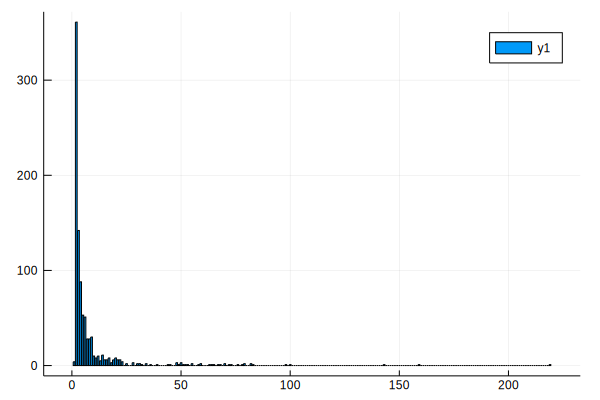

In [210]:
bar(in_c_SA)

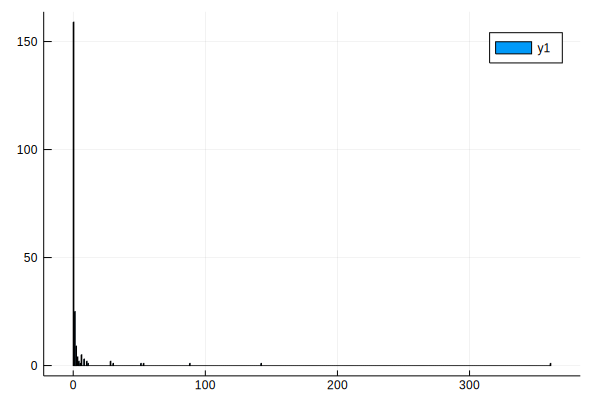

In [211]:
histogram(in_c_SA)

In [217]:
sort(countmap(in_c_SA))

OrderedCollections.OrderedDict{Int64,Int64} with 17 entries:
  0   => 159
  1   => 25
  2   => 9
  3   => 4
  4   => 2
  5   => 1
  6   => 5
  8   => 3
  10  => 2
  11  => 1
  28  => 2
  30  => 1
  51  => 1
  53  => 1
  88  => 1
  142 => 1
  361 => 1

In [178]:
n=nombres_SA;

#### Grado de salida

In [204]:
grado_salida_SA = out_degree(multiplexSA)

1×934 Array{Int64,2}:
 3  65  69  10  1  21  8  1  76  11  …  1  3  0  2  2  1  1  2  1  1  1  1

In [205]:
out_c_SA = counts(grado_salida_SA)

220-element Array{Int64,1}:
  11
 351
 150
  84
  58
  42
  32
  27
  31
   8
   8
  10
   6
   ⋮
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   1

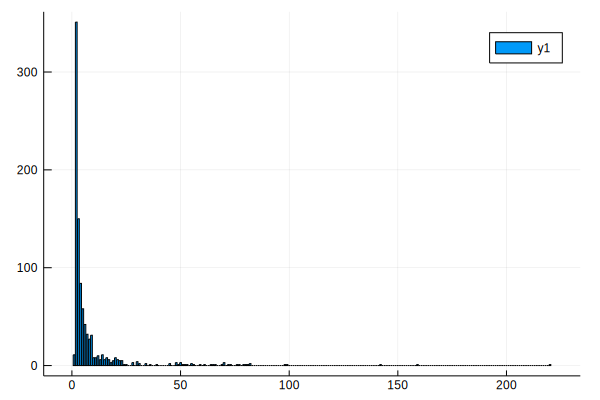

In [213]:
bar(out_c_SA)

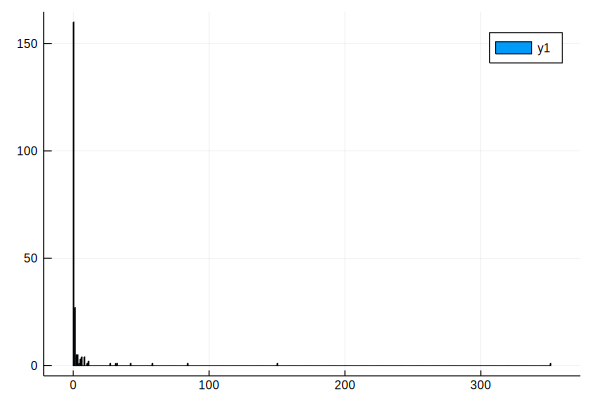

In [214]:
histogram(out_c_SA)

In [221]:
tt=sort(countmap(out_c_SA))

OrderedCollections.OrderedDict{Int64,Int64} with 18 entries:
  0   => 160
  1   => 27
  2   => 5
  3   => 5
  4   => 1
  5   => 3
  6   => 4
  8   => 4
  10  => 1
  11  => 2
  27  => 1
  31  => 1
  32  => 1
  42  => 1
  58  => 1
  84  => 1
  150 => 1
  351 => 1

In [220]:
#¿Cuántos nodos tienen grado de salida cero?
count(i->(i==0), out_c_SA)

160

### OneWorld

#### Grado de entrada

In [224]:
grado_entrada_OW = in_degree(multiplexOW)

698×1 Array{Int64,2}:
 11
 96
  6
  1
  1
  1
  2
  7
  1
  7
  3
  5
  4
  ⋮
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0

In [ ]:
in_c_OW = counts()

## Caminatas aleatorias

### Star Alliance

In [38]:
caminata_SA = @time random_walk(multiplexSA, 100, 5)

  5.687378 seconds (5.33 M allocations: 3.820 GiB, 8.69% gc time)


934-element Array{Any,1}:
 [1 3 … 12 3; 1 40 … 54 49; … ; 1 40 … 924 262; 1 61 … 113 87]                   
 [2 528 … 9 535; 2 6 … 189 181; … ; 2 555 … 344 384; 2 558 … 566 45]             
 [3 38 … 339 350; 3 58 … 262 913; … ; 3 30 … 219 187; 3 11 … 119 333]            
 [4 476 … 880 92; 4 290 … 691 119; … ; 4 11 … 77 152; 4 3 … 117 902]             
 [5 3 … 54 563; 5 3 … 593 11; … ; 5 3 … 19 553; 5 3 … 296 426]                   
 [6 73 … 684 683; 6 495 … 3 13; … ; 6 495 … 26 235; 6 55 … 83 11]                
 [7 566 … 0 0; 7 54 … 235 292; … ; 7 19 … 385 396; 7 19 … 19 552]                
 [8 23 … 93 162; 8 23 … 553 259; … ; 8 23 … 0 0; 8 23 … 23 9]                    
 [9 757 … 601 22; 9 552 … 276 117; … ; 9 11 … 199 237; 9 54 … 447 498]           
 [10 16 … 162 76; 10 73 … 276 438; … ; 10 553 … 716 83; 10 16 … 208 178]         
 [11 233 … 262 115; 11 606 … 303 215; … ; 11 176 … 296 395; 11 169 … 318 291]    
 [12 70 … 318 291; 12 11 … 426 396; … ; 12 89 … 237 168; 12 235 … 19 504

### OneWorld

In [39]:
caminata_OW = @time random_walk(multiplexOW, 100, 5)

  2.479682 seconds (3.09 M allocations: 1.909 GiB, 9.47% gc time)


698-element Array{Any,1}:
 [1 135 … 0 0; 1 11 … 168 211; … ; 1 115 … 0 0; 1 135 … 46 215]        
 [2 130 … 0 0; 2 21 … 653 634; … ; 2 236 … 61 249; 2 141 … 168 161]    
 [3 2 … 200 2; 3 46 … 532 229; … ; 3 1 … 0 0; 3 1 … 0 0]               
 [4 177 … 85 55; 4 177 … 0 0; … ; 4 177 … 482 97; 4 177 … 31 55]       
 [5 61 … 156 96; 5 61 … 136 177; … ; 5 61 … 46 211; 5 61 … 634 653]    
 [6 46 … 13 61; 6 46 … 35 46; … ; 6 46 … 271 141; 6 46 … 0 0]          
 [7 177 … 51 113; 7 46 … 0 0; … ; 7 177 … 59 2; 7 46 … 490 161]        
 [8 127 … 115 292; 8 271 … 61 187; … ; 8 127 … 0 0; 8 265 … 97 98]     
 [9 178 … 139 61; 9 178 … 29 59; … ; 9 178 … 450 85; 9 178 … 119 122]  
 [10 364 … 204 46; 10 271 … 115 161; … ; 10 46 … 61 27; 10 3 … 127 320]
 [11 89 … 124 177; 11 89 … 0 0; … ; 11 1 … 98 61; 11 1 … 0 0]          
 [12 127 … 127 62; 12 292 … 0 0; … ; 12 292 … 115 40; 12 127 … 0 0]    
 [13 2 … 15 122; 13 61 … 0 0; … ; 13 61 … 0 0; 13 61 … 178 248]        
 ⋮                                    

### Sky Team

In [40]:
caminata_ST = @time random_walk(multiplexST, 100, 5)

  4.830168 seconds (4.52 M allocations: 3.389 GiB, 8.34% gc time)


900-element Array{Any,1}:
 [1 35 … 45 18; 1 15 … 539 546; … ; 1 15 … 108 273; 1 35 … 0 0]                
 [2 15 … 324 130; 2 35 … 134 71; … ; 2 136 … 145 217; 2 35 … 842 617]          
 [3 125 … 387 52; 3 203 … 286 188; … ; 3 152 … 0 0; 3 73 … 65 529]             
 [4 35 … 156 61; 4 35 … 103 156; … ; 4 35 … 497 720; 4 35 … 835 176]           
 [5 95 … 550 283; 5 33 … 134 74; … ; 5 133 … 0 0; 5 28 … 0 0]                  
 [6 33 … 188 22; 6 136 … 55 62; … ; 6 25 … 35 34; 6 25 … 85 212]               
 [7 33 … 468 73; 7 33 … 0 0; … ; 7 25 … 64 63; 7 25 … 782 188]                 
 [8 18 … 188 75; 8 95 … 835 617; … ; 8 95 … 326 50; 8 188 … 0 0]               
 [9 25 … 163 73; 9 34 … 661 346; … ; 9 42 … 841 176; 9 35 … 483 103]           
 [10 34 … 95 83; 10 73 … 0 0; … ; 10 38 … 219 429; 10 75 … 880 61]             
 [11 133 … 188 286; 11 35 … 277 18; … ; 11 133 … 374 73; 11 35 … 469 470]      
 [12 35 … 120 73; 12 3 … 340 62; … ; 12 28 … 103 112; 12 95 … 842 91]          
 [13 28 … 33 9

## Longitud de todas las iteraciones de caminatas 

In [41]:
@time walk_length(caminata_SA)

  0.597962 seconds (1.53 M allocations: 418.612 MiB, 10.16% gc time)


934-element Array{Array,1}:
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [49, 100, 100, 100, 100] 
 [100, 100, 100, 79, 100] 
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 ⋮                        
 [100, 87, 62, 100, 100]  
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [0, 0, 0, 0, 0]          
 [0, 0, 0, 0, 0]          
 [0, 0, 0, 0, 0]          
 [0, 0, 0, 0, 0]          

In [42]:
@time walk_length(caminata_OW)

  0.374153 seconds (929.29 k allocations: 268.996 MiB, 12.01% gc time)


698-element Array{Array,1}:
 [61, 100, 13, 59, 100]   
 [9, 100, 54, 100, 100]   
 [100, 100, 33, 91, 38]   
 [100, 56, 100, 100, 100] 
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 2]  
 [100, 27, 100, 100, 100] 
 [100, 100, 100, 39, 100] 
 [100, 100, 100, 100, 100]
 [100, 100, 78, 100, 100] 
 [100, 67, 100, 100, 40]  
 [100, 16, 100, 100, 72]  
 [100, 12, 57, 36, 100]   
 ⋮                        
 [0, 0, 0, 0, 0]          
 [0, 0, 0, 0, 0]          
 [0, 0, 0, 0, 0]          
 [0, 0, 0, 0, 0]          
 [0, 0, 0, 0, 0]          
 [0, 0, 0, 0, 0]          
 [0, 0, 0, 0, 0]          
 [0, 0, 0, 0, 0]          
 [0, 0, 0, 0, 0]          
 [0, 0, 0, 0, 0]          
 [0, 0, 0, 0, 0]          
 [0, 0, 0, 0, 0]          

In [43]:
@time walk_length(caminata_ST)

  0.495688 seconds (1.38 M allocations: 386.110 MiB, 10.42% gc time)


900-element Array{Array,1}:
 [100, 100, 100, 100, 90] 
 [100, 100, 100, 100, 100]
 [100, 100, 100, 19, 100] 
 [100, 100, 100, 100, 100]
 [100, 100, 100, 3, 45]   
 [100, 100, 100, 100, 100]
 [100, 6, 100, 100, 100]  
 [100, 100, 100, 100, 39] 
 [100, 100, 100, 100, 100]
 [100, 7, 100, 100, 100]  
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 ⋮                        
 [100, 100, 100, 69, 100] 
 [100, 12, 100, 100, 100] 
 [100, 100, 71, 100, 100] 
 [100, 100, 100, 100, 100]
 [100, 100, 28, 100, 100] 
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [0, 0, 0, 0, 0]          
 [0, 0, 0, 0, 0]          
 [0, 0, 0, 0, 0]          
 [0, 0, 0, 0, 0]          

## Longitud promedio de las iteraciones de caminatas de cada nodo inicial

In [44]:
lpn_SA = @time walk_av_length(caminata_SA)

  0.596658 seconds (1.65 M allocations: 424.326 MiB, 10.92% gc time)


934-element Array{Any,1}:
 100.0
 100.0
 100.0
 100.0
 100.0
 100.0
  89.8
  95.8
 100.0
 100.0
 100.0
 100.0
 100.0
   ⋮  
  89.8
 100.0
 100.0
 100.0
 100.0
 100.0
 100.0
 100.0
   0.0
   0.0
   0.0
   0.0

In [49]:
#nombres_SA



934-element Array{Any,1}:
 "AOK"
 "ARN"
 "ATH"
 "AUH"
 "AXD"
 "BCN"
 "BEG"
 "BOD"
 "BRU"
 "BUD"
 "CAI"
 "CDG"
 "CFU"
 ⋮    
 "STL"
 "STT"
 "SYR"
 "TKK"
 "YAP"
 "HSN"
 "JUZ"
 "YIC"
 "GLF"
 "TMU"
 "GET"
 "PWM"

In [45]:
lpn_OW = @time walk_av_length(caminata_OW)

  0.352990 seconds (930.00 k allocations: 269.023 MiB, 11.36% gc time)


698-element Array{Any,1}:
  66.6
  72.6
  72.4
  91.2
 100.0
  80.4
  85.4
  87.8
 100.0
  95.6
  81.4
  77.6
  61.0
   ⋮  
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0

In [46]:
lpn_ST = @time walk_av_length(caminata_ST)

  0.496862 seconds (1.38 M allocations: 386.140 MiB, 11.19% gc time)


900-element Array{Any,1}:
  98.0
 100.0
  83.8
 100.0
  69.6
 100.0
  81.2
  87.8
 100.0
  81.4
 100.0
 100.0
 100.0
   ⋮  
  93.8
  82.4
  94.2
 100.0
  85.6
 100.0
 100.0
 100.0
   0.0
   0.0
   0.0
   0.0

In [ ]:
pyplot()
histogram(lpn_SA, 
    nbins = 50, 
    title="Longitud promedio de caminata por nodo", 
    xlabel="Promedio por nodo", 
    ylabel="Frecuencia",
    xlims = (0, 110))
histogram!(lpn_OW, nbins=50, falpha=0.4)
histogram!(lpn_ST, nbins=50, falpha=0.3)

## Cobertura

In [ ]:
cobs_SA = @time cobertura(caminata_SA)

In [ ]:
cobs_OW = @time cobertura(caminata_OW)

In [ ]:
cobs_ST = @time cobertura(caminata_ST)

## Cobertura promedio de las caminatas de cada aeropuerto inicial

In [ ]:
dif_SA = @time n_cobertura_av(caminata_SA)

In [ ]:
difSA = histogram(dif_SA, title="Cobertura promedio", xlabel="Promedio de cobertura", ylabel="Frecuencia")

In [ ]:
plot(dif_SA)

In [ ]:
dif_SA

In [ ]:
b = bar(dif_SA,xlim=(0,90),color="#0f87bf",alpha=0.4)

In [ ]:
dif_OW = @time n_cobertura_av(caminata_OW)

In [ ]:
difOW = histogram(dif_OW, nbins=100,title="Cobertura promedio", xlabel="Promedio de cobertura", ylabel="Frecuencia")

In [ ]:
dif_ST = @time n_cobertura_av(caminata_ST)

In [ ]:
difST = histogram(dif_ST,nbins=100, title="Cobertura promedio", xlabel="Promedio de cobertura", ylabel="Frecuencia")

In [ ]:
plot(difSA, difOW, difST, layout=(1,3),legend=false)

In [ ]:
difs = histogram(dif_SA, title="Cobertura promedio", xlabel="Promedio", ylabel="Frecuencia")
histogram!(dif_OW, falpha=0.4)
histogram!(dif_ST, falpha=0.4)

In [ ]:
groupedbar(rand(10,3), bar_position = :dodge, bar_width=0.7)

In [ ]:
#Plot que en el eje x tenga cada nodo inicial (aeropuerto) y en el eje y el promedio

In [ ]:
h = bar(1:80, frqs, color="#0f87bf",align="center",alpha=0.4)

## Cobertura promedio por alianza

In [ ]:
cobp_SA = @time cobertura_av(caminata_SA)

In [ ]:
cobp_OW = @time cobertura_av(caminata_OW)

In [ ]:
cobp_ST = @time cobertura_av(caminata_ST)

In [ ]:
y = [cobp_SA, cobp_OW, cobp_ST]
b = bar(y,
    color="#0f87bf",
    title="Cobertura",
    xlabel="Alianzas",
    ylabel = "Promedio de cobertura por Alianza", 
    alpha=0.4)

In [ ]:
b = bar(cobp_SA,color="#0f87bf",alpha=0.4)
bar!(cobp_OW,color="#0f00bf",alpha=0.4)
bar!(cobp_ST,color="#0f50bf",alpha=0.4)

In [ ]:
cobs_prom = plot(cobp_SA, title="Cobertura promedio", xlabel="Promedio", ylabel="Frecuencia")
plot!(cobp_OW, falpha=0.5)
plot!(cobp_ST, falpha=0.3)

### Prueba histograma

In [157]:
#Matriz
d = [0 1 0
     1 0 1
     0 0 0]

3×3 Array{Int64,2}:
 0  1  0
 1  0  1
 0  0  0

In [100]:
#Caminata
rwd = random_walk(d, 3, 1)

3-element Array{Any,1}:
 [1 2 1 2]
 [2 1 2 1]
 [3 0 0 0]

In [108]:
#Obtengo una de las iteraciones
uno=rwd[3]

1×4 Array{Int64,2}:
 3  0  0  0

In [126]:
#Lista de nombres
nom_d = ["Yuriko", "Tombo", "Sak"]

3-element Array{String,1}:
 "Yuriko"
 "Tombo" 
 "Sak"   

In [110]:
#Nombres en el orden de la caminata
while i != 0
    
    nomuno=nom_d[uno]

BoundsError: BoundsError: attempt to access 4-element Array{String,1} at index [[3 0 0 0]]

In [94]:
#Frecuencias de los números de las caminatas
his=counts(uno)

4-element Array{Int64,1}:
 1
 1
 1
 1

In [95]:
#Gráfica de barras de x = nombres ordenados vs. y = frecuencias
bar(nom_d,his)

ErrorException: bar recipe: x must be same length as y (centers), or one more than y (edges).
		length(x)=3, length(y)=4

In [140]:
dnan = [2 1 1
        1 2 1
        1 5 7]

3×3 Array{Int64,2}:
 2  1  1
 1  2  1
 1  5  7

In [148]:
out_degree(dnan)

1×3 Array{Int64,2}:
 4  8  9

In [155]:
as =counts(out_degree(dnan))

6-element Array{Int64,1}:
 1
 0
 0
 0
 1
 1

In [158]:
count_zeros(as)

MethodError: MethodError: no method matching count_zeros(::Array{Int64,1})
Closest candidates are:
  count_zeros(!Matched::Integer) at int.jl:397

In [161]:
?count

search: count counts countne counteq countmap countlines count_ones count_zeros



```
count(p, itr) -> Integer
count(itr) -> Integer
```

Count the number of elements in `itr` for which predicate `p` returns `true`. If `p` is omitted, counts the number of `true` elements in `itr` (which should be a collection of boolean values).

# Examples

```jldoctest
julia> count(i->(4<=i<=6), [2,3,4,5,6])
3

julia> count([true, false, true, true])
3
```


In [144]:
countmap([4,4,13])

Dict{Int64,Int64} with 2 entries:
  4  => 2
  13 => 1

In [125]:
rwdna = random_walk(dnan, 3, 1)

3-element Array{Any,1}:
 [1 1 1 1]
 [2 2 3 3]
 [3 1 1 3]

In [ ]:
#Con un histograma, tenemos colores distintos y leyenda para diferenciarlos
histogram(uno)
    #legend=)
#xticks=,
#yticks=)



In [ ]:
?histogram

In [ ]:
?bar

In [ ]:
c = random_walk(multiplexST, 100, 2)


#
j = sort(c[1][1,:])
x = nombres_ST[j]
h = countmap(x)
#histogram(h)
#hh=sort(h)

oh=hcat(hh)

bar(oh)

f=freqtable(j)

l = freqtable(x)

n =names(l)

typeof(l)

#bar(l)
bar(f,
    color="#0f87bf",
    title="Título",
    xlabel="Aeropuertos",
    ylabel = "Frecuencia de visitas", 
    #xticks = names(l),
    alpha=0.4)

prueba=

k = countmap(x)


get(k, 145, "NA")

freqtable(k)

histogram()

## 